<p style="text-align: center;font-size: 40pt">ROS visualizer (RVIZ)</p>
<p style="text-align: center;font-size: 20pt">3D visualization tool for ROS</p>
<img src="images/rviz_snap_2.png" width="100%" alt="Retrieved from ros.org"/>

Fortunately, not everything is done through a terminal in ROS.
[_Rviz_](http://wiki.ros.org/rviz) is a 3D visualization tool for ROS which allows us to inspect data flowing through ROS topics.
It is especially well suited for displaying 3D data, such as point clouds, mesh models of robots, trajectories or markers.
It also allows us to display streams of camera images.

In this lesson, we will have a look on basic controls and settings which are necessary to correctly display point clouds, images and markers.
For all other types of data, we will refer you to a [list of available displays](http://wiki.ros.org/rviz/DisplayTypes).
Good news is that using them always follows the same pattern, so it is easy to learn using a new one.
To put you in the mood, you can start by viewing this video:

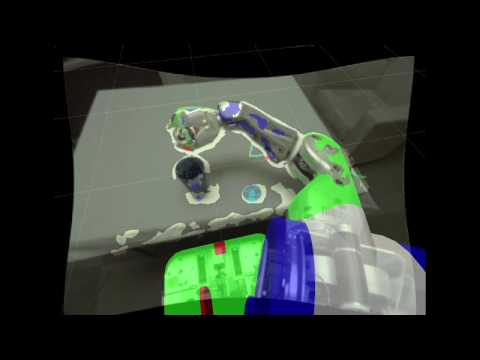

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('i--Sd4xH9ZE', width=720, height=480)

# Prerequisites for using Rviz in this lesson

The Rviz itself is already installed in your virtual machine as a component of ROS.
Given that you have a `roscore` running in some terminal, you can enter `rviz` (same effect as `rosrun rviz rviz`) in another terminal and run it.
You will see a default layout and no data displayed.

To be able to play with Rviz displays, we need some data in ROS topics in the first place.
On a real robot, those would be available after turning it on.
On a PC, there is just a roscore running, so not much fun.
To cope with that situation, we will use a topic-data-save-and-replay capability of ROS.
This capability is named `rosbag` and will be properly introduced in the [next lesson](3-lesson-ros-rosbag.ipynb).
But for now, simply proceed like this:

1. Run your `roscore` as usual (or keep running the one that you already have) and close Rviz if you still have one running.

1. Download the data file (a _rosbag_) from [this link](https://ulavaldti-my.sharepoint.com/:u:/g/personal/vlkub_ulaval_ca/EbzsXAnRhI5HvWV9VKthZvgBszz7xbu7CJNPBgVRX2w-eg?e=YUZNEy) (around 550 MB) and uncompress it into the `~/percep3d_data` folder in your home folder.
   If you want to do it command-line style:

   ```
$ cd ~/percep3d_data/
$ wget -o husky_short_demo.zip https://ulavaldti-my.sharepoint.com/:u:/g/personal/vlkub_ulaval_ca/EbzsXAnRhI5HvWV9VKthZvgBszz7xbu7CJNPBgVRX2w-eg?download=1
$ unzip husky_short_demo.zip
$ rm husky_short_demo.zip
   ```
   <br>
1. Open a new terminal and run these two commands:
```
$ rosparam set use_sim_time true
$ rosbag play --clock -l ~/percep3d_data/husky_short_demo.bag
```
   <br>
   Dealing with time is an entire topic outside the scope of this module.
   To make is simple, let's just say that a clock was recorded in the bag at the time of the deployment.
   The parameter `use_sim_time` tell ROS to **not** use the clock of your computer.
   The flag `--clock` will produce a simulated clock from what was recorded in the bag.
   Finally, the flag `-l` will keep playing the bagfile in a loop until terminated by pressing `CTRL+C`. 
   Keep it running for now.
   
1. Re-launch the Rviz from a terminal of your choice:

```
$ rviz
```

The bagfile which is playing in loop is a snippet from a DARPA competition sortie with our Husky robot.
It is approximately one minute long and contains all relevant sensor data that we used during the competition.
In this lesson, we will use point clouds and images from this bagfile to see how they look in Rviz.


# Using Rviz

## Rviz documentation online

Start by looking at this [site](http://wiki.ros.org/rviz/UserGuide).
It is a user guide for Rviz, just the screenshots are slightly outdated.
You can use this site anytime as a reference on how different panels and controls in Rviz work.
Just note that sections 1-3 have been already covered by what we have already done here, since you have one Rviz running at the moment.
The interesting content begins with section 4, where _Displays_ are introduced.
Read this section and try to add and remove some displays following their instructions to get familiar with the controls.

## Basic setting

We will guide you step by step to let you view the data recorded in the running rosbag.

### Fixed Frame
Fortunately, there is not much to configure to display data that we are interested in.
After launching Rviz, we just have to tell it which coordinate frame we consider the _Fixed Frame_.
This special coordinate frame is usually the not-moving one, for example a map frame, world frame, GPS frame - you name it.
Rviz automatically transforms all coordinates in the displayed data into this frame and then draws them in the main 3D view.

<img src="images/fixes_frame.png" width="25%" style="display:block; margin: 0 auto;" />

You will find the _Fixed Frame_ field in the _Global Options_ group in the _Displays_ panel, it is always the first one.
Rviz lets you choose from coordinate frames present in the data.
In our example bagfile, a good option for a Fixed Frame is the `odom` frame.

### Grid

Grid is just an optical guide in Rviz that helps us better understand the rendered 3D scene.
It is a grid by default rendered in the origin of the Fixed Frame.
You can set the number of cells and their size.
With the grid displayed, you can finally see some effect of rotating the 3D view with mouse.
Once we've mentioned using mouse, go to the [user guide](http://wiki.ros.org/rviz/UserGuide) page and see the section 6 to know which mouse button does what.

<img src="images/grid.png" width="25%" style="display:block; margin: 0 auto;" />

### Target Frame

Another useful setting is the _Target Frame_ in the _Views_ panel.
To activate it, we need to go in the top menu and click `Panels -> Views`.
It tells Rviz which coordinate frame to attach the view to.
Setting of this parameter depends on what you want to focus on.
If you were interested - for example - in observing a map which is static with respect to the fixed frame, the Target Frame would be the same as the _Fixed Frame_.
If you wanted the view to move together with a robot which moves around the environment, you would attach the view to an approriate coordinate frame of the robot.
In our case, such moving coordinate frame is called _base_link_.
If you choose the robot as a target frame, you should see the grid moving - this is because the robot moved in the recorded bagfile and the view moves together with the robot.

<img src="images/views.png" width="25%" style="display:block; margin: 0 auto;" />


## Displaying real data

Finally, we've got through the boring stuff and now we can focus on the interesting displays.
You've guessed it, _coordinate frames_.

### TF

ROS has a very useful system (_TF_) to keep track of transformations between coordinate frames.
This allows you to track position of a robot in the fixed world frame as well.
Or to look up position of an end-effector of a robotic arm with respect to the robot body.
We will have a look at TF in more details in a [dedicated lesson](4-lesson-ros-tf.ipynb).
For now, we will only focus on displaying them.

Rviz has a display to visualize all these coordinate frames.
It is called TF and generally needs no configuration - at the moment you add it, you should see all the frames.
Or at least those for which there is a transformation into the fixed frame (so Rviz knows where to draw them).

You should see something similar to this (yet more tiny) when you add the TF display:

<img src="images/tf.png" width="75%" style="display:block; margin: 0 auto;" />

To take this screenshot, we have enlarged the markers by setting Scale to 20 and selected only a few Frames from the list.
Try to achieve the same thing by exploring the menu &#9658; TF &#9658; Frames.

Moreover, notice that the _odom_ frame lies in the center of the grid.
Try changing the Fixed Frame to _map_ and see what the difference is.
Also notice that the the View type we use causes the camera to move with the Target Frame, but not to rotate.
If you wanted the view to rotate with the robot, use the _ThirdPersonFollower_ view.

### Point Clouds

Ok, TF and coordinate frames are not such a thrill after all.
Point clouds are the reason you chose this course, so here they come.
The display for the type of point clouds we use is called _PointCloud2_.
It needs to know the name of a ROS topic with the point cloud data.
In our bagfile, the topic is called `/rslidar16_points`.
Click the Add button to add a PointCloud2 and then select the appropriate topic.
You should see something like this:

<img src="images/pointcloud.png" width="75%" style="display:block; margin: 0 auto;" />

You can start by replicating the settings from the screenshot above to get similar results.
Explore possibilities of this display type in the [documentation](http://wiki.ros.org/rviz/DisplayTypes/PointCloud).
For example, try to change the coloring of the points from coloring by the Z axis coordinates into coloring by the intensity of received laser reflections.
This is pretty much everything you need to know to display point clouds in Rviz.
Easy, isn't it?

### Images

Another display type we use all the time is the _Image_ display.
It displays images, no surprise there.
It needs to know the image topic name and the type of image transport used.
ROS contains a mechanism which allows automatic image encoding and decoding called [_Image Transport_](http://wiki.ros.org/image_transport).
It helps to save communication bandwidth by using jpeg, [Theora](https://en.wikipedia.org/wiki/Theora) or other compression algorithms.
On a running robot, you would see among all topic a few maybe looking like this:
- `/front_camera/camera_info`
- `/front_camera/image`
- `/front_camera/image/compressed`
- `/front_camera/image/theora`

The first topic `/front_camera/camera_info` contains camera calibration information useful for image analysis and re-projection.
The following one, `/front_camera/image`, allows us to subscribe raw, uncompressed image data.
The image messages will be HUGE.
The Image Transport magic comes with the following topics, which transmit the same image, but in compressed form.
_Compressed_ stands for JPEG compression, _theora_ for Theora codec which involves key frames and diff messages and which is intended for continuous video streaming (similarly to h.264) which also possible to run in Image Transport.

The Rviz display needs to know the `/front_camera/image` part of the topic name and the type of transport you wish the Rviz to use to get the images.
In our bagfile, the images recorded by the Husky robot are stored in these topics:
- `/camera_0/camera_info`
- `/camera_0/image_raw/compressed`
- `/camera_1/camera_info`
- `/camera_1/image_raw/compressed`
- `/camera_2/camera_info`
- `/camera_2/image_raw/compressed`
- `/camera_3/camera_info`
- `/camera_3/image_raw/compressed`
- `/camera_4/camera_info`
- `/camera_4/image_raw/compressed`
- `/camera_5/camera_info`
- `/camera_5/image_raw/compressed`

The naming is not completely standard, since the _raw_ topic would not be named `/camera_X/image`, but `/camera_0/image_raw` instead.
This does not prevent us from visualizing the images, it is just that Rviz will refuse to list available image topics in the drop-down menu in the Image display.
You have to write it there manually, as the following screenshot suggests.
The transport type we use is _compressed_, since it is the only one stored in the bagfile.
If we had stored the raw image messages, the bagfile would be even bigger and now it is already around 550 MB for just a minute of recording.

<img src="images/image.png" width="75%" style="display:block; margin: 0 auto;" />

Explore the other image topics from the bagfile (camera_1 to camera_5) to look around the robot.
Moreover, you can open the _Camera_ display instead of the _Image_ display.
It has the same basic configuration fields, but the thing it draws is different...
See for yourself.

Once you are done, go to the [exercise](../../exercises/ros/2e-exercises_rviz.ipynb) for this lesson.

&#8635; [Go back to the list of lessons](0-overview.ipynb)